<a href="https://colab.research.google.com/github/austinlasseter/DS-Unit-2-Applied-Modeling/blob/master/module2-wrangle-ml-datasets/232_responses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 2*

---


# Wrangle ML datasets 
- Explore tabular data for supervised machine learning
- Join relational data for supervised machine learning

### A note in preparation for Unit 3

When you're doing your initial data exploration, you're educating yourself about the data, assessing data integrity, and formulating a plan of attack for your predictive model.

The best answer to any of these questions may vary from dataset to dataset. *Experiment* with a simple model to help you through the exploratory data analysis phase.

#### Meaningful Variation
  - Are there any features that are simply constant or quasi-constant values? 
  - Duplicated features?
  - Duplicated rows?
  - Are any of your features highly correlated together?
    - Linear models can be particularly sensitive to multi-collinearity.
    - Larger (esp. wide) datasets tend to have redundant features.

#### Categorical Encodings

  - What are your high cardinality categories?
  - Are there any rare labels that might benefit from grouping together?
  - Are there any categories that could be transformed into a meaningful rank (custom ordinal encoding)?

#### Distributions

  - What are the frequencies of your categorical labels?
  - Is your target feature normally distributed? (Assumption for linear regression model)

#### Outliers
  - How sensitive is your model type to outliers?
    - Less sensitive models include tree-based models. 
    - Linear models, neural networks, and other distance-based models will almost always benefit from scaling.
  - What strategy will you use to identify and handle outliers?

#### Feature Selection

  Why should we reduce the number of features?
  - Reduces potential overfitting
  - Fewer features -> easier interpretation for your stakeholders.
  - Easier implementation and maintain by software engineers.
  - Reduced computational resource requirement.

#### Reproducibility

  - Always set a random seed.
  - Comment, comment, comment!
  - Print out versions of your software.
  - Implement version control for your *data* as well as your *code* (esp. with timestamps!)
  - Wrap your code in reproducible functions / classes for modularity of steps, including feature loading, data wrangling, feature processing, etc. (i.e., *use sklearn pipelines!*)
  - Combine your modularized functions / classes in a single, centralized pipeline to execute your modularized 
  - Print out / record your final model parameters (optimized hyperparameter values).
  - Record other details of the model: final features passed in, transformations employed, etc.(Jupyter makes this very transparent, but long notebooks can be more confusing than long-form scripts. 

# Explore tabular data for supervised machine learning 🍌

Wrangling your dataset is often the most challenging and time-consuming part of the modeling process.

In today's lesson, we’ll work with a dataset of [3 Million Instacart Orders, Open Sourced](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2)!

Let’s get set up:


In [60]:
import os
import zipfile
import shutil
from glob import glob

In [61]:
# download and unzip the datafile
!wget https://www.dropbox.com/s/pofcl26lvoj6073/instacart-market-basket-analysis.zip
!unzip instacart-market-basket-analysis.zip

--2020-10-02 00:54:49--  https://www.dropbox.com/s/pofcl26lvoj6073/instacart-market-basket-analysis.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.1, 2620:100:6032:1::a27d:5201
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/pofcl26lvoj6073/instacart-market-basket-analysis.zip [following]
--2020-10-02 00:54:50--  https://www.dropbox.com/s/raw/pofcl26lvoj6073/instacart-market-basket-analysis.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd62bc1eb444dd33f882ee6c54e.dl.dropboxusercontent.com/cd/0/inline/BAf9gTFLDaJQNUjAt339lWC3aKqxGE0U2UEKJDF1XF9DBWA2_4Cfdzi9TCDVoM3Ah5Dr4AqvalWEHp0NGYhcXCGwVfFoUC5LiDO9jy7TMByhwgggeHr_-v_ub2MuICx5FEg/file# [following]
--2020-10-02 00:54:50--  https://ucd62bc1eb444dd33f882ee6c54e.dl.dropboxusercontent.com/cd/0/inline/BAf9gTFLDaJQNUjAt339lWC3aKqxGE0U2UEKJDF

In [62]:
# Change directory to where the data was uncompressed
%cd instacart-market-basket-analysis
print(os.getcwd())

/content/instacart-market-basket-analysis/instacart-market-basket-analysis
/content/instacart-market-basket-analysis/instacart-market-basket-analysis


In [63]:
# unzip each of those files and move it to the current working directly
import zipfile
import shutil
from glob import glob

def get_those_files(filename):
  with zipfile.ZipFile(filename+'.csv.zip','r') as zip_ref:
      zip_ref.extractall(filename)
  shutil.move(filename+"/"+filename+".csv", filename+".csv")

for filename in ['aisles', 'departments', 'order_products__prior', 'order_products__train', 'orders', 'products']:
  get_those_files(filename)

# Print the csv filenames

for filename in glob('*.csv'):
  print (filename)

order_products__train.csv
order_products__prior.csv
orders.csv
aisles.csv
departments.csv
products.csv


### For each csv file, look at its shape & head 

In [64]:
import pandas as pd
from IPython.display import display


def preview():
  for filename in glob('*.csv'):
    df = pd.read_csv(filename)
    print ('\n',filename, df.shape)
    display(df.head())

preview()


 order_products__train.csv (1384617, 4)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1



 order_products__prior.csv (32434489, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0



 orders.csv (3421083, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0



 aisles.csv (134, 2)


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation



 departments.csv (21, 2)


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol



 products.csv (49688, 4)


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


## The original task was complex ...

[The Kaggle competition said,](https://www.kaggle.com/c/instacart-market-basket-analysis/data):

> The dataset for this competition is a relational set of files describing customers' orders over time. The goal of the competition is to predict which products will be in a user's next order.

> orders.csv: This file tells to which set (prior, train, test) an order belongs. You are predicting reordered items only for the test set orders.

Each row in the submission is an order_id from the test set, followed by product_id(s) predicted to be reordered.

> sample_submission.csv: 
```
order_id,products
17,39276 29259
34,39276 29259
137,39276 29259
182,39276 29259
257,39276 29259
```

## ... but we can simplify!

Simplify the question, from "Which products will be reordered?" (Multi-class, [multi-label](https://en.wikipedia.org/wiki/Multi-label_classification) classification) to **"Will customers reorder this one product?"** (Binary classification)

Which product? How about **the most frequently ordered product?**

# Questions:

- What is the most frequently ordered product?
- What percent of orders include this product?
- Which customers have ordered this product before?
- How can we get a subset of data, just for these customers?
- What features can we engineer? We want to predict, will these customers reorder this product on their next order?

## What was the most frequently ordered product?

In [65]:
order_products__train = pd.read_csv('order_products__train.csv')

In [66]:
# Product id 24852 was ordered almost 20 thousand times
# in the orders in this table
order_products__train['product_id'].value_counts()

24852    18726
13176    15480
21137    10894
21903     9784
47626     8135
         ...  
44256        1
2764         1
4815         1
43736        1
46835        1
Name: product_id, Length: 39123, dtype: int64

In [67]:
# show a few orders with that product in them
temp = order_products__train[order_products__train['product_id']==24852]
print(len(temp))
temp.head()

18726


,order_id,product_id,add_to_cart_order,reordered
115,226,24852,2,0
156,473,24852,2,0
196,878,24852,2,1
272,1042,24852,1,1
297,1139,24852,1,1


In [68]:
# Read the products table, to
# figure out the product name for product id 24852
products = pd.read_csv("products.csv")
print(products.shape)
products.head()


(49688, 4)


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [69]:
# merge the tables together
train = pd.merge(order_products__train, products, on='product_id', how='inner')

In [70]:
# looks like it's a banana
train[train['product_id']==24852].head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
129688,226,24852,2,0,Banana,24,4
129689,473,24852,2,0,Banana,24,4
129690,878,24852,2,1,Banana,24,4
129691,1042,24852,1,1,Banana,24,4
129692,1139,24852,1,1,Banana,24,4


In [71]:
# that's a lot of bananas!
train['product_name'].value_counts()

Banana                          18726
Bag of Organic Bananas          15480
Organic Strawberries            10894
Organic Baby Spinach             9784
Large Lemon                      8135
                                ...  
Pact Cranberry Concord Grape        1
Passionberry Twist                  1
Just Croutons, Garlic               1
Organic Spinach Pow Salad           1
Green Tea Dandelion                 1
Name: product_name, Length: 39123, dtype: int64

## What percent of orders include this product?

There are [three sets of data](https://www.kaggle.com/c/instacart-market-basket-analysis):

> "prior": orders prior to that users most recent order (3.2m orders)  
"train": training data supplied to participants (131k orders)  
"test": test data reserved for machine learning competitions (75k orders)

Customers' next orders are in the "train" and "test" sets. (The "prior" set has the orders prior to the most recent orders.)

We can't use the "test" set here, because we don't have its labels (only Kaggle & Instacart have them), so we don't know what products were bought in the "test" set orders.

So, we'll use the "train" set. It currently has one row per product_id and multiple rows per order_id.

But we don't want that. Instead we want one row per order_id, with a binary column: "Did the order include the product?"

Let's wrangle!

In [72]:
# add a new boolean column
train['bananas'] = train['product_name'] == 'Banana'
train.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,bananas
0,1,49302,1,1,Bulgarian Yogurt,120,16,False
1,816049,49302,7,1,Bulgarian Yogurt,120,16,False
2,1242203,49302,1,1,Bulgarian Yogurt,120,16,False
3,1383349,49302,11,1,Bulgarian Yogurt,120,16,False
4,1787378,49302,8,0,Bulgarian Yogurt,120,16,False


In [73]:
# 1.4% of the PRODUCTS ordered are bananas
train['bananas'].value_counts(normalize=True)

False    0.986476
True     0.013524
Name: bananas, dtype: float64

In [90]:
# For each order, were any of the products bananas?
train_wrangled = train.groupby('order_id')['bananas'].any().reset_index()
train_wrangled.sample(10)

,order_id,bananas
64780,1675042,False
58555,1514924,False
23276,600675,False
33658,866490,False
54742,1415575,False
12437,321264,False
17240,446625,False
7314,189343,True
86885,2256625,False
124906,3257931,True


In [75]:
# ~ 14% of ORDERS included bananas
train_wrangled['bananas'].value_counts(normalize=True)

False    0.857281
True     0.142719
Name: bananas, dtype: float64

# Join relational data for supervised machine learning

## Overview
Often, you’ll need to join data from multiple relational tables before you’re ready to fit your models.

## Which customers have ordered bananas before?

- Customers are identified by `user_id`
- Products are identified by `product_id`

Do we have a table with both these id's? 

(If not, how can we combine this information?)

No, we don't have a table with both these id's. But:
- `orders.csv` has `user_id` and `order_id`
- `order_products__prior.csv` has `order_id` and `product_id`
- `order_products__train.csv` has `order_id` and `product_id` too



In [77]:
# In the train table, which orders included bananas?
train[train.bananas==True].head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,bananas
129688,226,24852,2,0,Banana,24,4,True
129689,473,24852,2,0,Banana,24,4,True
129690,878,24852,2,1,Banana,24,4,True
129691,1042,24852,1,1,Banana,24,4,True
129692,1139,24852,1,1,Banana,24,4,True


In [78]:
# get the order ID's for bananas
banana_order_ids = train[train.bananas==True].order_id
banana_order_ids.head()

129688     226
129689     473
129690     878
129691    1042
129692    1139
Name: order_id, dtype: int64

In [79]:
# Look at the orders table
orders = pd.read_csv('orders.csv')
orders.sample(n=5)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
2934513,3233166,177027,prior,15,1,22,13.0
14261,2768812,889,prior,2,5,10,21.0
632552,1858572,38107,prior,3,0,17,8.0
3063533,1353407,184784,prior,7,3,13,26.0
3058581,3221845,184484,prior,2,1,11,21.0


In [80]:
# In the orders table, which orders included bananas?
orders[orders.order_id.isin(banana_order_ids)]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
25,1492625,2,train,15,1,11,30.0
485,698604,34,train,6,4,13,30.0
623,1864787,43,train,12,5,11,26.0
652,1947848,46,train,20,4,20,11.0
881,13318,56,train,13,1,9,6.0
...,...,...,...,...,...,...,...
3420581,681092,206181,train,15,1,13,30.0
3420692,2530125,206191,train,6,0,9,30.0
3420786,3383615,206196,train,5,0,15,30.0
3420933,1716008,206205,train,4,1,16,10.0


In [81]:
# Check an order_id from above, confirm that yes it includes bananas
train[train.order_id==1492625].head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,bananas
40632,1492625,11913,28,0,Shelled Pistachios,117,19,False
137883,1492625,24852,8,1,Banana,24,4,True
199519,1492625,9387,10,0,Granny Smith Apples,24,4,False
202785,1492625,45066,9,1,Honeycrisp Apple,24,4,False
241750,1492625,5450,11,1,Small Hass Avocado,24,4,False


In [82]:
# get the orders that had bananas
banana_orders = orders[orders.order_id.isin(banana_order_ids)]
banana_orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
25,1492625,2,train,15,1,11,30.0
485,698604,34,train,6,4,13,30.0
623,1864787,43,train,12,5,11,26.0
652,1947848,46,train,20,4,20,11.0
881,13318,56,train,13,1,9,6.0


In [83]:
# In the orders table, which users have bought bananas?
banana_user_ids = banana_orders.user_id.unique()
banana_user_ids[:5]

array([ 2, 34, 43, 46, 56])

## How can we get a subset of data, just for these customers?

We want *all* the orders from customers who have *ever* bought the product.

(And *none* of the orders from customers who have *never* bought the product.)

In [84]:
# orders table, shape before getting subset
orders.shape

(3421083, 7)

In [85]:
# orders table, shape after getting subset
orders_subset = orders[orders.user_id.isin(banana_user_ids)]
orders_subset.shape

(332661, 7)

In [86]:
# look at the first 5
orders_subset.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
11,2168274,2,prior,1,2,11,NaN
12,1501582,2,prior,2,5,10,10.0
13,1901567,2,prior,3,1,10,3.0
14,738281,2,prior,4,2,10,8.0
15,1673511,2,prior,5,3,11,8.0


## What features can we engineer? We want to predict, will these customers reorder bananas on their next order?

- Products per order
- Time of day
- Have they reordered bananas before? (Have ordered bananas >= 2 times)
- Other fruit they buy 
- Size of orders (customers with smaller orders on average are less likely to be reordering any particular product on their next order)


- Frequency of banana orders:
    - % of orders 
    - Time between banana orders: Every n days on average
    - Raw count: Total orders, how many times have you ordered bananas?

- Recency of banana orders
    - n days since you ordered banana




In [92]:
# Size of orders (how many products in an order?)
product_order_counts = train.groupby(['order_id']).count()['product_id']
product_order_counts

order_id
1           8
36          8
38          9
96          7
98         49
           ..
3421049     6
3421056     5
3421058     8
3421063     4
3421070     3
Name: product_id, Length: 131209, dtype: int64

In [93]:
# is our data skewed?
product_order_counts.describe()

count    131209.000000
mean         10.552759
std           7.932847
min           1.000000
25%           5.000000
50%           9.000000
75%          14.000000
max          80.000000
Name: product_id, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


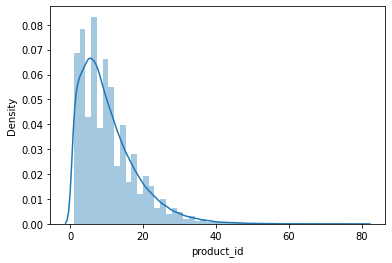

In [94]:
# most orders have only a few products
import seaborn as sns
sns.distplot(product_order_counts)

In [ ]:
# remember the subset we created earlier? (it only has bananas)
len(orders_subset)

332661

In [88]:
# Pick out an individual user for exploration & experiments
USER_ID = 2
my_user = orders_subset[orders_subset.user_id==USER_ID]
my_user

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
11,2168274,2,prior,1,2,11,NaN
12,1501582,2,prior,2,5,10,10.0
13,1901567,2,prior,3,1,10,3.0
14,738281,2,prior,4,2,10,8.0
15,1673511,2,prior,5,3,11,8.0
16,1199898,2,prior,6,2,9,13.0
17,3194192,2,prior,7,2,12,14.0
18,788338,2,prior,8,1,15,27.0
19,1718559,2,prior,9,2,9,8.0
20,1447487,2,prior,10,1,11,6.0


## Challenge

**Continue to clean and explore your data.** Can you **engineer features** to help predict your target? For the evaluation metric you chose, what score would you get just by guessing? Can you **make a fast, first model** that beats guessing?

We recommend that you use your portfolio project dataset for all assignments this sprint. But if you aren't ready yet, or you want more practice, then use the New York City property sales dataset today. Follow the instructions in the assignment notebook. [Here's a video walkthrough](https://youtu.be/pPWFw8UtBVg?t=584) you can refer to if you get stuck or want hints!